<a href="https://colab.research.google.com/github/jigglypufflazybaby/deep-learning-lab/blob/main/MNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import gradio as gr

In [4]:
# Data preparation
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
    x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
    return (x_train, y_train), (x_test, y_test)

In [5]:
# Model development
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [6]:
  # Model training and evaluation
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                        validation_split=0.1, verbose=1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return history, test_acc

In [7]:
# Analysis and visualization
def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def generate_classification_report(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

In [8]:
# Gradio interface function
def predict_digit(image):
    # Preprocess the image
    image = image.reshape((1, 28, 28, 1)).astype('float32') / 255

    # Make prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    # Prepare confidence scores
    confidence_scores = {str(i): float(prediction[0][i]) for i in range(10)}

    return {str(predicted_class): confidence_scores[str(predicted_class)]}, confidence_scores

Training model for MNIST dataset
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8704 - loss: 0.4387 - val_accuracy: 0.9823 - val_loss: 0.0563
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9837 - loss: 0.0532 - val_accuracy: 0.9837 - val_loss: 0.0583
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9877 - val_loss: 0.0443
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9898 - val_loss: 0.0413
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9890 - val_loss: 0.0396
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9918 - val_loss: 0.0349
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9900 - val_loss: 0.0430
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 

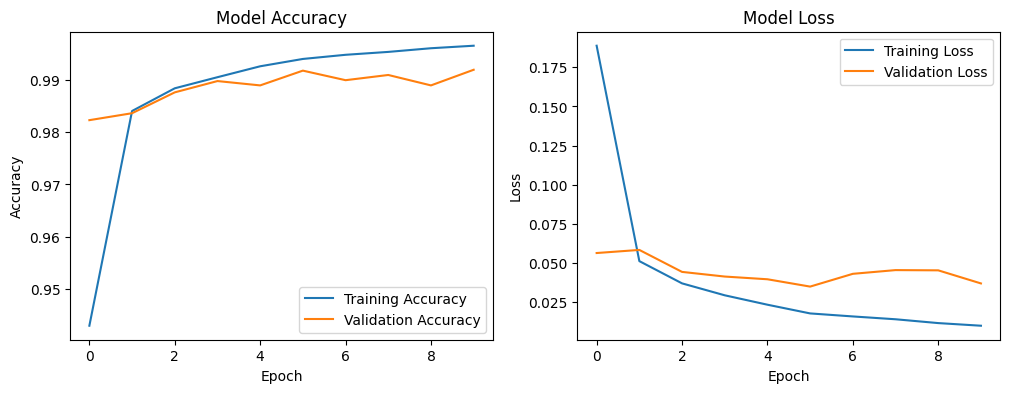

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://085de21be150b29fd3.gradio.live

This share link expires in 72 hours. For free per

In [9]:
# Main execution
def main():
    global model  # Make model global so it can be accessed by Gradio interface

    print("Training model for MNIST dataset")
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    model = create_model()
    history, test_acc = train_and_evaluate_model(model, x_train, y_train, x_test, y_test)

    print(f"Test accuracy: {test_acc:.4f}")
    plot_accuracy_loss(history)
    generate_classification_report(model, x_test, y_test)

    # Create Gradio interface
    iface = gr.Interface(
        fn=predict_digit,
        inputs=gr.Image(type="numpy", image_mode="L"), # Remove the shape argument
        outputs=[gr.Label(num_top_classes=1), gr.Label(label="Confidence Scores")],
        live=True,
        title="MNIST Digit Classifier",
        description="Draw a digit (0-9) and see the model's prediction.",
    )

    # Launch the interface
    iface.launch(share=True)

if __name__ == "__main__":
    main()